In [1]:
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


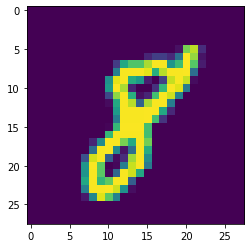

In [4]:
#plot the first image in the dataset
plt.imshow(X_train[17])

In [5]:
#check image shape
X_train[0].shape

(28, 28)

In [6]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [7]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[17]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [8]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [9]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2421 - accuracy: 0.9542 - val_loss: 0.0816 - val_accuracy: 0.9741
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0627 - accuracy: 0.9810 - val_loss: 0.1135 - val_accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0483 - accuracy: 0.9843 - val_loss: 0.0899 - val_accuracy: 0.9730


In [11]:
#show predictions for the first 3 images in the test set
model.predict(X_test[:4])

array([[2.4793223e-07, 2.7671170e-12, 1.4029008e-08, 1.6949243e-05,
        1.0053270e-12, 2.3205486e-08, 8.6575387e-13, 9.9998224e-01,
        3.8185800e-07, 1.6213988e-07],
       [1.0068635e-06, 1.9858310e-06, 9.9997294e-01, 3.3387701e-07,
        4.6919694e-11, 2.9950081e-10, 2.3622291e-05, 4.8116040e-09,
        1.4244453e-07, 1.5707836e-10],
       [4.8521990e-05, 9.9794132e-01, 5.3763313e-07, 8.5975006e-07,
        4.3830546e-04, 3.5861885e-06, 1.2615194e-06, 8.6586406e-06,
        1.5565503e-03, 2.7490165e-07],
       [9.9997604e-01, 1.1894550e-11, 9.3317038e-07, 2.6844324e-08,
        7.8034873e-10, 2.8180634e-07, 3.3087958e-06, 3.5412768e-07,
        1.4625731e-06, 1.7616387e-05]], dtype=float32)

In [12]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)